In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
# local imports
from src import draw_event
from src import compose_event
from src import SttCSVReader

### _Dataset_

In [6]:
# mu+mu- data (current)
input_dir = 'train_all'

In [7]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [8]:
file_prefixes[:10]

['train_all/event0000000000',
 'train_all/event0000000001',
 'train_all/event0000000002',
 'train_all/event0000000003',
 'train_all/event0000000004',
 'train_all/event0000000005',
 'train_all/event0000000006',
 'train_all/event0000000007',
 'train_all/event0000000008',
 'train_all/event0000000009']

In [9]:
event_id = 0
event_prefix = file_prefixes[event_id]

In [10]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000000 memory usage 0.03 MB


In [11]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-14.869700,-10.605,35.0,9,0,38
1,2,-15.744300,-11.110,35.0,9,1,144
2,3,-16.618999,-11.615,35.0,9,2,256
3,4,-17.493700,-12.120,35.0,9,3,374
4,5,-18.368401,-12.625,35.0,9,4,498


In [12]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.034734,15204100.0,15.2041,9,0,38,0,2
1,2,0.048140,25058700.0,25.0587,9,1,144,0,2
2,3,0.055623,13596100.0,13.5961,9,2,256,0,2
3,4,0.046304,12138100.0,12.1381,9,3,374,0,2
4,5,0.009433,26845900.0,26.8459,9,4,498,0,2


In [13]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,0.417332,0.938952,-0.457557,1,25,13,0
1,2,0.0,0.0,0.0,-0.493657,-0.352344,0.712380,1,24,13,0
2,3,0.0,0.0,0.0,-0.166948,0.059120,0.264588,1,26,13,0
3,4,0.0,0.0,0.0,0.573950,0.219286,-0.417693,1,22,13,0
4,5,0.0,0.0,0.0,-0.296571,0.510891,0.733194,1,26,13,0


In [14]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-14.852000,-10.6347,43.741699,-0.273197,-0.162639,0.765421,1.0,10
1,2,-15.722200,-11.1478,46.171398,-0.274899,-0.160593,0.765203,1.0,10
2,3,-16.597000,-11.6535,48.600101,-0.276364,-0.157971,0.765186,1.0,10
3,4,-17.476700,-12.1505,51.029800,-0.277693,-0.155004,0.765268,1.0,10
4,5,-18.360901,-12.6388,53.460499,-0.279028,-0.152464,0.765253,1.0,10


### _Build Event_

In [15]:
event = compose_event(event_prefix,skewed=False)

In [16]:
event.shape

(159, 26)

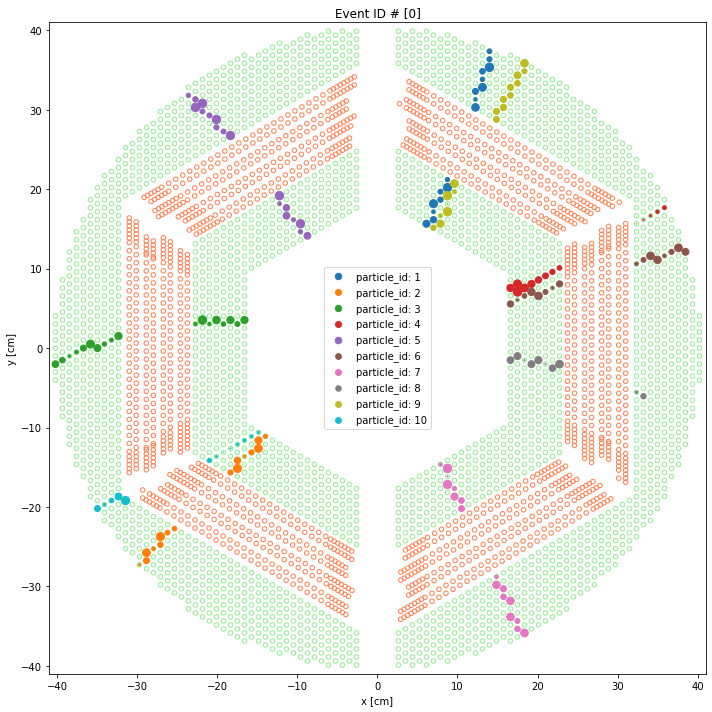

In [17]:
draw_event(event,figsize=(10, 10));

### SttCSVReader

In [18]:
csv_reader = SttCSVReader(input_dir, True, True)

In [19]:
data = csv_reader(1)

In [20]:
data.hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,event_id
0,1,-12.2456,12.120,35.0,9,0,12,0.262386,0,0,1
1,2,-13.1203,12.625,35.0,9,1,117,0.052152,0,0,1
2,3,-13.9950,13.130,35.0,9,2,228,0.374347,0,0,1
3,4,-13.9950,14.140,35.0,9,3,344,0.265922,0,0,1
4,5,-14.8697,14.645,35.0,9,4,467,0.085074,0,0,1


In [21]:
data.hits.shape

(252, 11)

In [22]:
csv_reader = SttCSVReader(input_dir, True, False)

In [23]:
data = csv_reader(event_id)

In [24]:
data.hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,event_id,layer
0,1,-14.869700,-10.605,35.0,9,0,38,0.034734,0,2,0,0
1,23,6.997490,15.150,35.0,9,0,99,0.191241,0,5,0,0
2,49,16.618999,-1.515,35.0,9,0,77,0.300751,0,4,0,0
3,67,7.872170,-14.645,35.0,9,0,59,0.062322,0,3,0,0
4,94,16.618999,5.555,35.0,9,0,84,0.265425,0,4,0,0


In [25]:
data.hits.shape

(159, 12)

In [26]:
data.hits.layer_id.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25], dtype=int32)

In [27]:
data.hits.layer.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [28]:
data.event_file

'/home/adeak977/current/3_deeptrkx/ctd2022/train_all/event0000000000'

In [29]:
data.event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,...,pdgcode,start_time,pt,peta,r,phi,eta,r3,absZ,tpt
0,1,-14.869700,-10.605,35.0,9,0,38,0.034734,0,2,...,-13,0,0.323897,1.599773,18.264008,-2.522066,1.405582,39.478779,35.0,0.317943
1,23,6.997490,15.150,35.0,9,0,99,0.191241,0,5,...,-13,0,0.817033,0.592080,16.687941,1.138107,1.486331,38.774830,35.0,0.813472
2,49,16.618999,-1.515,35.0,9,0,77,0.300751,0,4,...,-13,0,0.232231,-0.985962,16.687910,-0.090909,1.486333,38.774815,35.0,0.222155
3,67,7.872170,-14.645,35.0,9,0,59,0.062322,0,3,...,-13,0,1.035057,0.831504,16.626699,-1.077575,1.489651,38.748512,35.0,1.031945
4,94,16.618999,5.555,35.0,9,0,84,0.265425,0,4,...,-13,0,1.392711,-0.304733,17.522818,0.322581,1.442470,39.141399,35.0,1.386653


In [30]:
data.particles

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,pt,peta
0,1,0.0,0.0,0.0,0.417332,0.938952,-0.457557,1,25,13,0,1.027520,-0.431762
1,2,0.0,0.0,0.0,-0.493657,-0.352344,0.712380,1,24,13,0,0.606501,0.999593
2,3,0.0,0.0,0.0,-0.166948,0.059120,0.264588,1,26,13,0,0.177107,1.191400
3,4,0.0,0.0,0.0,0.573950,0.219286,-0.417693,1,22,13,0,0.614414,-0.636059
4,5,0.0,0.0,0.0,-0.296571,0.510891,0.733194,1,26,13,0,0.590732,1.042060
5,6,0.0,0.0,0.0,1.306140,0.483366,-0.431004,-1,24,-13,0,1.392711,-0.304733
6,7,0.0,0.0,0.0,0.512504,-0.899268,0.963316,-1,27,-13,0,1.035057,0.831504
7,8,0.0,0.0,0.0,0.232228,0.001136,-0.267914,-1,18,-13,0,0.232231,-0.985962
8,9,0.0,0.0,0.0,0.331983,0.746545,0.512512,-1,26,-13,0,0.817033,0.592080
9,10,0.0,0.0,0.0,-0.247409,-0.209041,0.769250,-1,22,-13,0,0.323897,1.599773


## _Detector Layout_

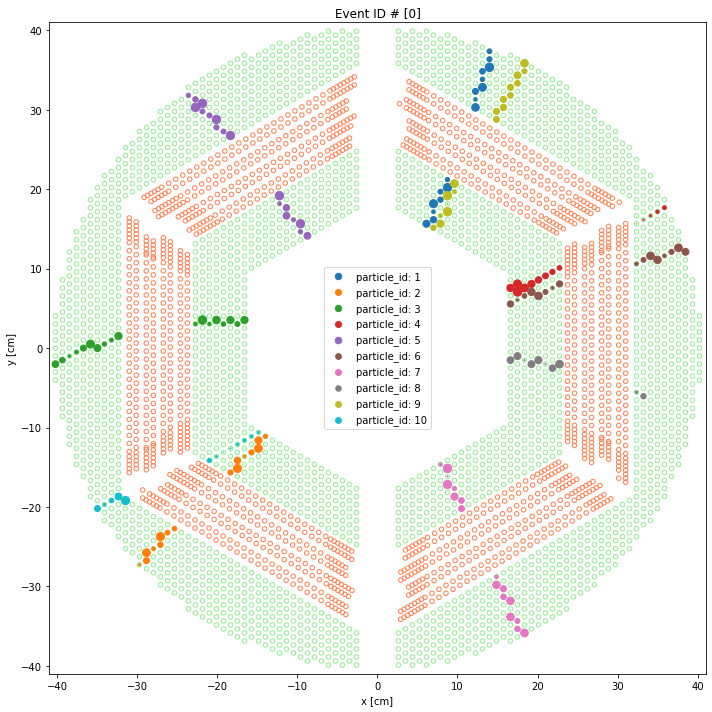

In [31]:
draw_event(data.event,figsize=(10, 10));

## _Inspect HDFStore_

- See [IO tools (text, CSV, HDF5, …)](https://pandas.pydata.org/docs/user_guide/io.html)

#### HDF5 Store

- read/write using `pd.HDFStore("path/to/*.h5")`
- read/write using `pd.read_hdf()`, `pd.to_hdf()` similar to `pd.read_csv()` and `pd.to_csv()`
    *. `pd.read_hdf()`: Read from the store, close it if we opened it.
- close when finished

In [32]:
# path to HDF5 Store
hdf5_path = 'run/trkx_reco_eval/eval_particles.h5'

In [33]:
# Method 1: use context manager to open store
with pd.HDFStore(hdf5_path, 'r') as store:
    print(store)

<class 'pandas.io.pytables.HDFStore'>
File path: run/trkx_reco_eval/eval_particles.h5



In [34]:
# Method 2: Use constructor method. Don't forget to close it using store.close()
store = pd.HDFStore(hdf5_path)

In [35]:
store.groups()

[/data (Group) ''
   children := ['axis0' (Array), 'axis1' (Array), 'block0_items' (Array), 'block0_values' (Array), 'block1_items' (Array), 'block1_values' (Array), 'block2_items' (Array), 'block2_values' (Array), 'block3_items' (Array), 'block3_values' (Array), 'block4_items' (Array), 'block4_values' (VLArray)]]

In [36]:
# get stored dataframe using group
store.get('data').head()

,particle_id,pt,n_true_hits,is_matched,is_trackable,evtid
0,6,0.461538,18,True,True,900
1,9,0.073745,15,True,True,900
2,8,0.510547,17,True,True,900
3,4,0.712900,17,True,True,900
4,2,0.650417,18,True,True,900


In [37]:
# OR, get stored dataframe using group
store['data'].head()

,particle_id,pt,n_true_hits,is_matched,is_trackable,evtid
0,6,0.461538,18,True,True,900
1,9,0.073745,15,True,True,900
2,8,0.510547,17,True,True,900
3,4,0.712900,17,True,True,900
4,2,0.650417,18,True,True,900


In [38]:
store.close()

In [39]:
store.is_open

False

In [40]:
# Method 3: Retrieve pandas object stored in h5 file
store = pd.read_hdf(hdf5_path)

In [41]:
store.head()

,particle_id,pt,n_true_hits,is_matched,is_trackable,evtid
0,6,0.461538,18,True,True,900
1,9,0.073745,15,True,True,900
2,8,0.510547,17,True,True,900
3,4,0.712900,17,True,True,900
4,2,0.650417,18,True,True,900
